#Iman Jani
#Option 1: Pyber
#Matplot Assignment

# three observable trends based on the data.

    1-Number of  Drivers in Rural types are less than Urban and Suburban
    2-obviously when the number of drivers in Rural area is less than all others , number of rides is also lower 
    3-fare and number of rides have negative correlation(-0.447495)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# read from CSV files
df_city=pd.read_csv("city_data.csv")
df_ride=pd.read_csv("ride_data.csv")

In [32]:
#Merg two data sets to add city type on ride database
df_merged=df_ride.merge(df_city, on='city', how='left')
df_merged.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


Getting the below values:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


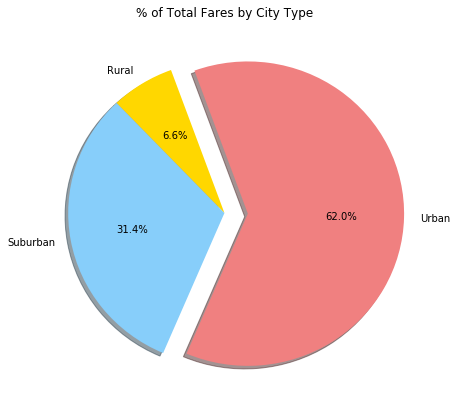

In [33]:
#Average Fare ($) Per City
Average_fare=df_merged.groupby("city").fare.mean()

#Total Number of drivers Per City
total_driver=df_merged.groupby("city").driver_count.sum()

#Total Number of Rides Per City
total_rides=df_merged.groupby("city").ride_id.count()



#create a pivot table to see the % of Total Fares by City Type
df_pivot=df_merged.pivot_table(index="type", aggfunc="sum")

#adding the % part per city to the pivot tble
df_pivot["%fare_city_type"]=(df_pivot.fare).astype(float)/df_pivot.fare.sum()*100

#add index 
df_pivot=df_pivot.reset_index()


#enable mathplot 
%matplotlib inline

#pie chart for Total Fare by City Typ

colors=('Gold', 'Lightskyblue', 'Lightcoral')

plt.figure(figsize = (7,7))

explode=[0,0,0.15]


plt.pie(df_pivot["%fare_city_type"], labels=df_pivot["type"], colors=colors, explode=explode,
    autopct="{0:1.1f}%".format, shadow=True, startangle=110)

plt.title("% of Total Fares by City Type")



In [34]:
#Create a datafram from variables 

n_df={"Average_fare":Average_fare,
    "total_driver":total_driver,
    "total_rides":total_rides,
    }

n_df=pd.DataFrame(n_df)

#reset index then we can merge with city type file

n_df=n_df.reset_index()

#merge with city type to add city type to Data Frame
df=n_df.merge(df_city, on='city')

df.head()


,city,Average_fare,total_driver,total_rides,driver_count,type
0,Alvarezhaven,23.928710,651,31,21,Urban
1,Alyssaberg,20.609615,1742,26,67,Urban
2,Anitamouth,37.315556,144,9,16,Suburban
3,Antoniomouth,23.625000,462,22,21,Urban
4,Aprilchester,21.981579,931,19,49,Urban


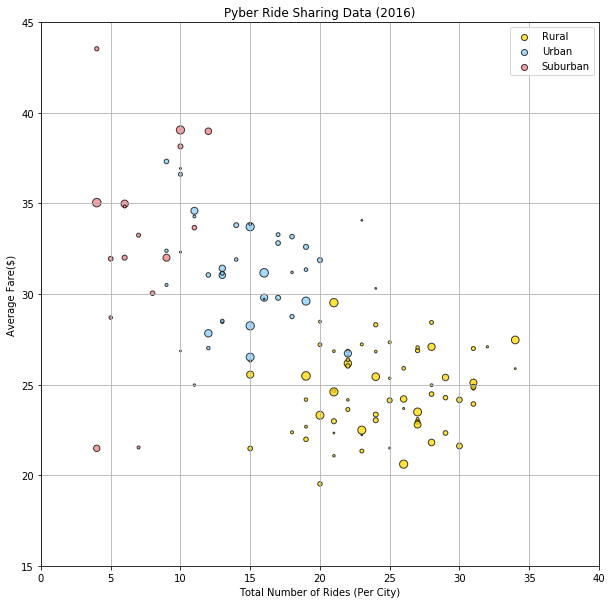

In [39]:
#Scatter Plot 
plt.figure(figsize = (10,10))



plt.scatter(df[df['type']=="Urban"]['total_rides'],df[df['type']=="Urban"]['Average_fare'], marker="o", 
            facecolors='Gold', edgecolors="black",
            sizes=df['driver_count'], alpha=0.75, linewidths=1, label="Urban")

plt.scatter(df[df['type']=="Suburban"]['total_rides'],df[df['type']=="Suburban"]['Average_fare'], marker="o", 
            facecolors='Lightskyblue', edgecolors="black",
            sizes=df['driver_count'], alpha=0.75, linewidths=1, label="Suburban")

plt.scatter(df[df['type']=="Rural"]['total_rides'],df[df['type']=="Rural"]['Average_fare'], marker="o", 
            facecolors='Lightcoral', edgecolors="black",
            sizes=df['driver_count'], alpha=0.75, linewidths=1, label="Rural")




legend=["Rural","Urban", "Suburban"]
#adding Title
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

plt.legend(legend)
#change X avd Y axis limits
plt.xlim(0, 40)
plt.ylim(15, 45)
plt.grid()
plt.show()

In [8]:
#check the correlation

df.corr()

#fare and number of rides have negative correlation



,Average_fare,total_driver,total_rides,driver_count
Average_fare,1.000000,-0.547734,-0.447495,-0.544916
total_driver,-0.547734,1.000000,0.550670,0.956224
total_rides,-0.447495,0.550670,1.000000,0.385512
driver_count,-0.544916,0.956224,0.385512,1.000000


Getting the below values:
* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type


In [9]:
# create a Pivot Table and then add above columns

df_1=df.pivot_table(index="type", aggfunc="sum", margins=False)

df_1["%fare_city_type"]=(df_1.Average_fare).astype(float)/df_1.Average_fare.sum()*100
df_1["% Total Rides by City Type"]=(df_1.total_rides).astype(float)/df_1.total_rides.sum()*100
df_1["% Total Drivers by City Type"]=(df_1.total_driver).astype(float)/df_1.total_driver.sum()*100

df_1

,Average_fare,driver_count,total_driver,total_rides,%fare_city_type,% Total Rides by City Type,% Total Drivers by City Type
type,,,,,,,
Rural,615.728572,104,727,125,17.393335,5.058681,0.962480
Suburban,1300.433953,638,10306,721,36.735153,29.178470,13.644187
Urban,1623.863390,2607,64501,1625,45.871511,65.762849,85.393333


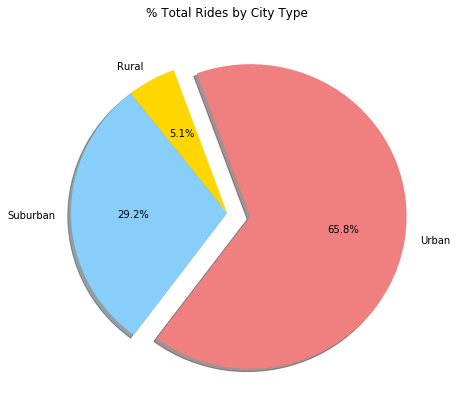

In [10]:

#Pie Chart "% Total Rides by City Type

plt.figure(figsize = (7,7))

explode=[0,0,0.15]


plt.pie(df_1["% Total Rides by City Type"], labels=df_pivot["type"], colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=110)

plt.title("% Total Rides by City Type")


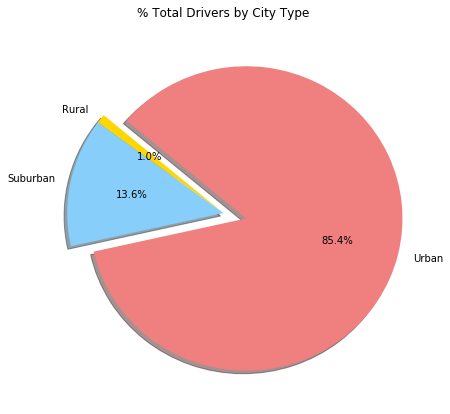

In [11]:
#Pie Chart "% Total Rides by City Type

plt.figure(figsize = (7,7))

explode=[0,0,0.15]


plt.pie(df_1["% Total Drivers by City Type"], labels=df_pivot["type"], colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

plt.title("% Total Drivers by City Type")